# WeatherPy


#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [3]:
# Save Config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build a partial querry URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Test Cities
test_cities = ["Minneapolis", "Chicago", "Rochester", "Duluth"]

# Set up list to hold response info
City_ID = 0
CityID = []
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

print("Beginning Data Retrieval")
print("-------------------------------")

# Loop through the list of cities and perform a request for data on each
for i in cities:
    
    # Create search query, make request and store in json
    query= query_url + i
    response = requests.get(query)
    weather_json = response.json()
    
   
    # Try to grab the list information
    try:
        City.append(weather_json['name'])
        Cloudiness.append(weather_json['clouds']['all'])
        Country.append(weather_json['sys']['country'])
        Date.append(weather_json['dt'])
        Humidity.append(weather_json['main']['humidity'])
        Lat.append(weather_json['coord']['lat'])
        Lng.append(weather_json['coord']['lon'])
        Max_Temp.append(weather_json['main']['temp_max'])
        Wind_Speed.append(weather_json['wind']['speed'])
        City_ID = City_ID + 1
        time.sleep(1)
        print(f"Processing Record {City_ID} | {i}")
        
    
    # Handle exceptions for missing data
    except:
        City_ID = City_ID + 1
        print("City not found. Skipping...")
        pass

Beginning Data Retrieval
-------------------------------
Processing Record 1 | akdepe
Processing Record 2 | sept-iles
Processing Record 3 | atuona
Processing Record 4 | maragogi
Processing Record 5 | monastyrshchina
Processing Record 6 | port elizabeth
Processing Record 7 | hermanus
Processing Record 8 | rikitea
City not found. Skipping...
Processing Record 10 | mana
Processing Record 11 | novobureyskiy
Processing Record 12 | neyshabur
Processing Record 13 | covington
Processing Record 14 | mingguang
Processing Record 15 | thompson
Processing Record 16 | narsaq
Processing Record 17 | ulaangom
Processing Record 18 | souillac
Processing Record 19 | east london
Processing Record 20 | atasu
Processing Record 21 | cap-aux-meules
Processing Record 22 | chuy
Processing Record 23 | beloha
Processing Record 24 | bengkulu
Processing Record 25 | kavieng
Processing Record 26 | cherskiy
Processing Record 27 | tiznit
Processing Record 28 | albany
Processing Record 29 | port alfred
Processing Record 

Processing Record 251 | amahai
Processing Record 252 | saint-germain-de-grantham
Processing Record 253 | geraldton
Processing Record 254 | loandjili
Processing Record 255 | katsuura
Processing Record 256 | kapit
Processing Record 257 | kieta
Processing Record 258 | dungarpur
Processing Record 259 | george town
Processing Record 260 | chokurdakh
Processing Record 261 | townsville
City not found. Skipping...
Processing Record 263 | chaiya
Processing Record 264 | natal
City not found. Skipping...
Processing Record 266 | tabory
Processing Record 267 | dingle
Processing Record 268 | tateyama
City not found. Skipping...
Processing Record 270 | bluff
Processing Record 271 | valparaiso
Processing Record 272 | trelew
Processing Record 273 | avarua
City not found. Skipping...
Processing Record 275 | miraflores
Processing Record 276 | laguna
Processing Record 277 | cabo san lucas
Processing Record 278 | namibe
Processing Record 279 | lamu
Processing Record 280 | kudahuvadhoo
Processing Record 281

Processing Record 501 | palmer
Processing Record 502 | oranjemund
Processing Record 503 | mount gambier
Processing Record 504 | najran
Processing Record 505 | ajdabiya
Processing Record 506 | yate
Processing Record 507 | portland
Processing Record 508 | payerne
Processing Record 509 | inongo
Processing Record 510 | coihaique
Processing Record 511 | jieshi
Processing Record 512 | puerto escondido
Processing Record 513 | doha
Processing Record 514 | meadow lake
Processing Record 515 | tommot
Processing Record 516 | malumfashi
Processing Record 517 | promyshlennovskiy
Processing Record 518 | chapais
Processing Record 519 | millinocket
Processing Record 520 | tambura
Processing Record 521 | horsham
Processing Record 522 | hualmay
City not found. Skipping...
Processing Record 524 | berlevag
Processing Record 525 | bagratashen
Processing Record 526 | alice springs
Processing Record 527 | abu dhabi
Processing Record 528 | luau
City not found. Skipping...
Processing Record 530 | staryy nadym
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert raw data to DataFrame
cities_df = pd.DataFrame({
    'City': City,
    'Lat': Lat,
    'Lng': Lng,
    'Max Temp': Max_Temp,
    'Humidity': Humidity,
    'Cloudiness': Cloudiness,
    'Wind Speed': Wind_Speed,
    'Country': Country,
    'Date': Date
})

# Export the city data into a .csv
cities_df.to_csv(r'C:\Users\weber\Desktop\python-api-challenge\python-api-challenge\WeatherPy\cities.csv', header=True)

# Display the DataFrame
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Akdepe,42.0551,59.3788,37.40,65,0,11.50,TM,1612975048
1,Sept-Îles,50.2001,-66.3821,12.99,44,20,13.80,CA,1612974842
2,Atuona,-9.8000,-139.0333,78.93,77,6,20.31,PF,1612975051
3,Maragogi,-9.0122,-35.2225,83.86,69,74,13.38,BR,1612975052
4,Monastyrshchina,54.3496,31.8380,0.91,93,92,7.25,RU,1612975053


In [5]:
# Reduce the DataFrame and analize
reduced_cities_df = cities_df.drop(columns=['City', 'Country'])

reduced_cities_df.describe(percentiles=[0.25, 0.5, 0.75]).head(10)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,20.286588,17.953639,51.247270,70.765957,48.781915,8.066720,1.612975e+09
std,32.497886,89.475337,33.824716,20.087867,38.636903,5.546565,2.165610e+02
min,-54.800000,-175.200000,-43.600000,5.000000,0.000000,0.180000,1.612975e+09
25%,-3.416650,-65.176250,27.337500,61.000000,5.000000,4.022500,1.612975e+09
50%,24.616700,23.079600,64.000000,74.000000,40.000000,6.910000,1.612975e+09
75%,47.470850,96.138050,78.717500,86.000000,90.000000,10.607500,1.612976e+09
max,78.218600,179.316700,98.710000,100.000000,100.000000,35.680000,1.612976e+09


## Inspect the data and remove the cities where the humidity > 100%.

Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# max humidity is 100%. Skipping this step.
reduced_cities_df.describe(percentiles=[0.25, 0.5, 0.75]).head(10)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,20.286588,17.953639,51.247270,70.765957,48.781915,8.066720,1.612975e+09
std,32.497886,89.475337,33.824716,20.087867,38.636903,5.546565,2.165610e+02
min,-54.800000,-175.200000,-43.600000,5.000000,0.000000,0.180000,1.612975e+09
25%,-3.416650,-65.176250,27.337500,61.000000,5.000000,4.022500,1.612975e+09
50%,24.616700,23.079600,64.000000,74.000000,40.000000,6.910000,1.612975e+09
75%,47.470850,96.138050,78.717500,86.000000,90.000000,10.607500,1.612976e+09
max,78.218600,179.316700,98.710000,100.000000,100.000000,35.680000,1.612976e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

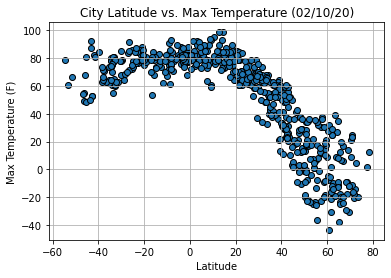

In [14]:
# Build a scatter plot 
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (02/10/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsTemperature.png")

# Show plot
plt.show()

This scatter plot shows the relationship between maximum temperature and latitude
measured in 564 total cities on February 10, 2020.

## Latitude vs. Humidity Plot

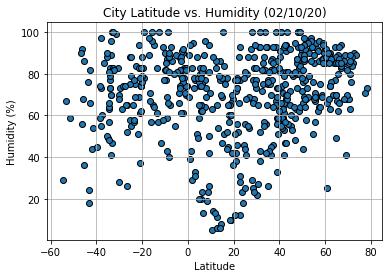

In [15]:
# Build a scatter plot 
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (02/10/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsHumidity.png")

# Show plot
plt.show()

This scatter plot shows the relationship between humidity percentage and latitude
measured in 564 total cities on February 9, 2020.

## Latitude vs. Cloudiness Plot

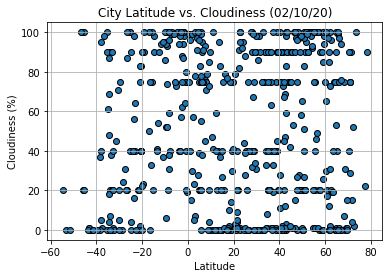

In [16]:
# Build a scatter plot 
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (02/10/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsCloudiness.png")

# Show plot
plt.show()

This scatter plot shows the relationship between cloudiness percentage and latitude
measured in 564 total cities on February 9, 2020.

## Latitude vs. Wind Speed Plot

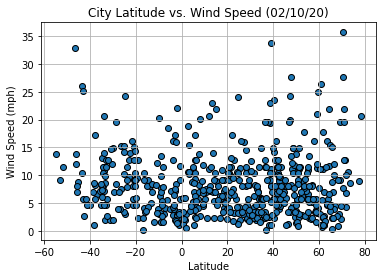

In [17]:
# Build a scatter plot 
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (02/10/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsWindSpeed.png")

# Show plot
plt.show()

This scatter plot shows the relationship between wind speed and latitude
measured in 564 total cities on February 9, 2020.

## Linear Regression

In [11]:
# Separate DataFrame into Northern and Southern Hemisphere
north_df = cities_df.loc[(cities_df["Lat"] >= 0)]

south_df = cities_df.loc[(cities_df["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7829823917319199


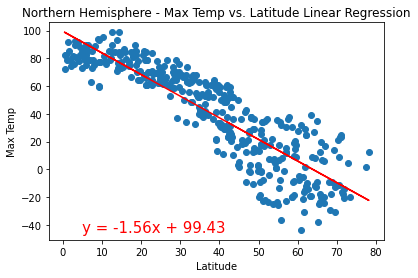

In [48]:
# Plot out Max Temp vs Lat in scatter plot
# Add the linear regression equation and line to the plot
# Print out the r-squared value along with the plot
x_values = north_df['Lat']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-45),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("LatitudeVsTemperatureNRegress.png")

plt.show()

This linear regression shows a negative correlaton between latitude and max temperature.
For every one degree change in latitute the max temperature is expected to decrease by
1.56 degrees fahrenheit. The r-square measurement indicates latitude explains 78% of
variance in max temperatures. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.19783333955843344


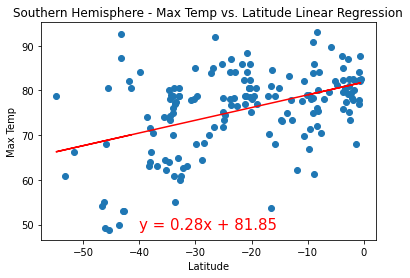

In [49]:
# Plot out Max Temp vs Lat in scatter plot
# Add the linear regression equation and line to the plot
# Print out the r-squared value along with the plot
x_values = south_df['Lat']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,49),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("LatitudeVsTemperatureSRegress.png")

plt.show()

This linear regression shows a negative correlaton between latitude and max temperature.
For every one degree change in latitute the max temperature is expected to decrease by
0.28 degrees fahrenheit. The r-square measurement indicates latitude explains 20% of
variance in max temperatures. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14070383623705793


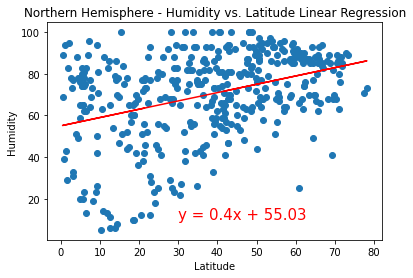

In [50]:
# Plot out Humidity vs Lat in scatter plot
# Add the linear regression equation and line to the plot
# Print out the r-squared value along with the plot
x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("LatitudeVsHumidityNRegress.png")

plt.show()

This linear regression shows a positive correlaton between latitude and humidity.
For every one degree change in latitute the humidity is expected to increase by
0.4 percent. The r-square measurement indicates latitude explains 14% of
variance in humidity. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08257316925171494


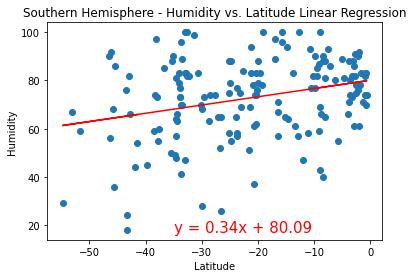

In [51]:
# Plot out Humidity vs Lat in scatter plot
# Add the linear regression equation and line to the plot
# Print out the r-squared value along with the plot
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,17),fontsize=15,color="red")
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("LatitudeVsHumiditySRegress.png")

plt.show()

This linear regression shows a negative correlaton between latitude and humidity.
For every one degree change in latitute the humidity is expected to decrease by
0.34 percent. The r-square measurement indicates latitude explains 8% of
variance in humidity. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0021303693019718356


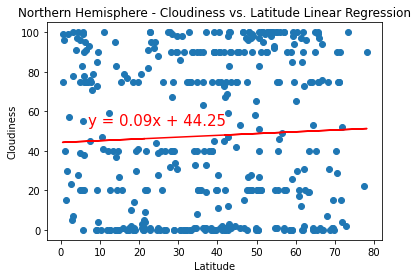

In [52]:
# Plot out Cloudiness vs Lat in scatter plot
# Add the linear regression equation and line to the plot
# Print out the r-squared value along with the plot
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,53),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("LatitudeVsCloudinessNRegress.png")

plt.show()

This linear regression shows little if any correlaton between latitude and cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21956983250044967


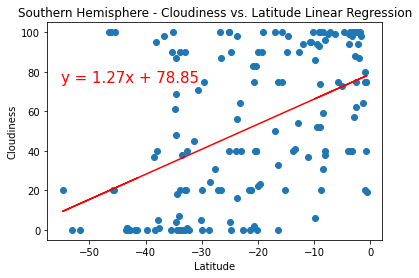

In [53]:
# Plot out Cloudiness vs Lat in scatter plot
# Add the linear regression equation and line to the plot
# Print out the r-squared value along with the plot
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,75),fontsize=15,color="red")
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("LatitudeVsCloudinessSRegress.png")

plt.show()

This linear regression shows a negative correlaton between latitude and cloudiness.
For every one degree change in latitute the cloudiness is expected to decrease by
1.27 percent. The r-square measurement indicates latitude explains 22% of
variance in humidity. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.007237852453966317


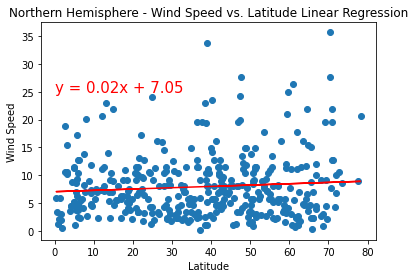

In [54]:
# Plot out Wind Speed vs Lat in scatter plot
# Add the linear regression equation and line to the plot
# Print out the r-squared value along with the plot
x_values = north_df['Lat']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("LatitudeVsWindSpeedNRegress.png")

plt.show()

This linear regression shows little if any correlaton between latitude and wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08128999698374711


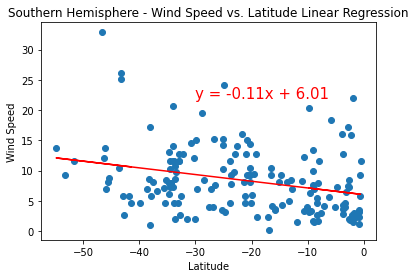

In [55]:
# Plot out Wind Speed vs Lat in scatter plot
# Add the linear regression equation and line to the plot
# Print out the r-squared value along with the plot
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,22),fontsize=15,color="red")
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("LatitudeVsWindSpeedSRegress.png")

plt.show()

This linear regression shows a positive correlaton between latitude and wind speed.
For every one degree change in latitute the wind speed is expected to increase by
0.11 miles per hour. The r-square measurement indicates latitude explains 8% of
variance in humidity. 

### Three Observable Trends
1) Latitude does a decent job predicting maximum day temperatures in the Northern Hemisphere (0.78 r-squared) but not in the Southern Hemisphere (0.20 r-squared).

2) Latitude does a poor job predicting: wind speed, cloudiness, and humidity. R-squared measuements were all under 22% for these variables. 

3) This data does show that maximum day temperatures get hotter as the city proximity to the equator increases. This is visible in the latitude vs. max temperature plot. This relationship is more visualy distinguished in the Northern Hemisphere, where it is currently winter, than the Southern Hemisphere.